In [1]:
import pandas as pd
import numpy as np
import re
import html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
books = pd.read_csv('D:/Database/database/cleaned_datasets/books_cleaned.csv')

In [4]:
books = books.head(5000)

In [5]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,mark p. o. morford,2002.0,oxford university press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,carlo d'este,1991.0,harperperennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,gina bari kolata,1999.0,farrar straus giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,e. j. w. barber,1999.0,w. w. norton &amp; company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
4995,0061043508,strong poison,dorothy l. sayers,1995.0,harpertorch,http://images.amazon.com/images/P/0061043508.0...,http://images.amazon.com/images/P/0061043508.0...,http://images.amazon.com/images/P/0061043508.0...
4996,0811828964,the bad girl's guide to getting what you want,cameron tuttle,2000.0,chronicle books,http://images.amazon.com/images/P/0811828964.0...,http://images.amazon.com/images/P/0811828964.0...,http://images.amazon.com/images/P/0811828964.0...
4997,0671624342,a matter of honor,jeffrey archer,1986.0,simon &amp; schuster,http://images.amazon.com/images/P/0671624342.0...,http://images.amazon.com/images/P/0671624342.0...,http://images.amazon.com/images/P/0671624342.0...
4998,0786890169,black water,t. jefferson parker,2003.0,hyperion,http://images.amazon.com/images/P/0786890169.0...,http://images.amazon.com/images/P/0786890169.0...,http://images.amazon.com/images/P/0786890169.0...


Data Preprocessing

In [6]:
def clean_text(text):
    if pd.isnull(text):
        return ''
    text = html.unescape(text)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

In [7]:
books['Book-Title'] = books['Book-Title'].apply(clean_text)
books['Book-Author'] = books['Book-Author'].apply(clean_text)
books['Publisher'] = books['Publisher'].apply(clean_text)

In [8]:
books['soup'] = books['Book-Title'] + ' ' + (books['Book-Author'] + ' ') * 3 + books['Publisher']

In [16]:
indices = pd.Series(books.index, index=books['Book-Title']).to_dict()

Text Vectorization

In [17]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['soup'])

Similarity Matrix

In [10]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

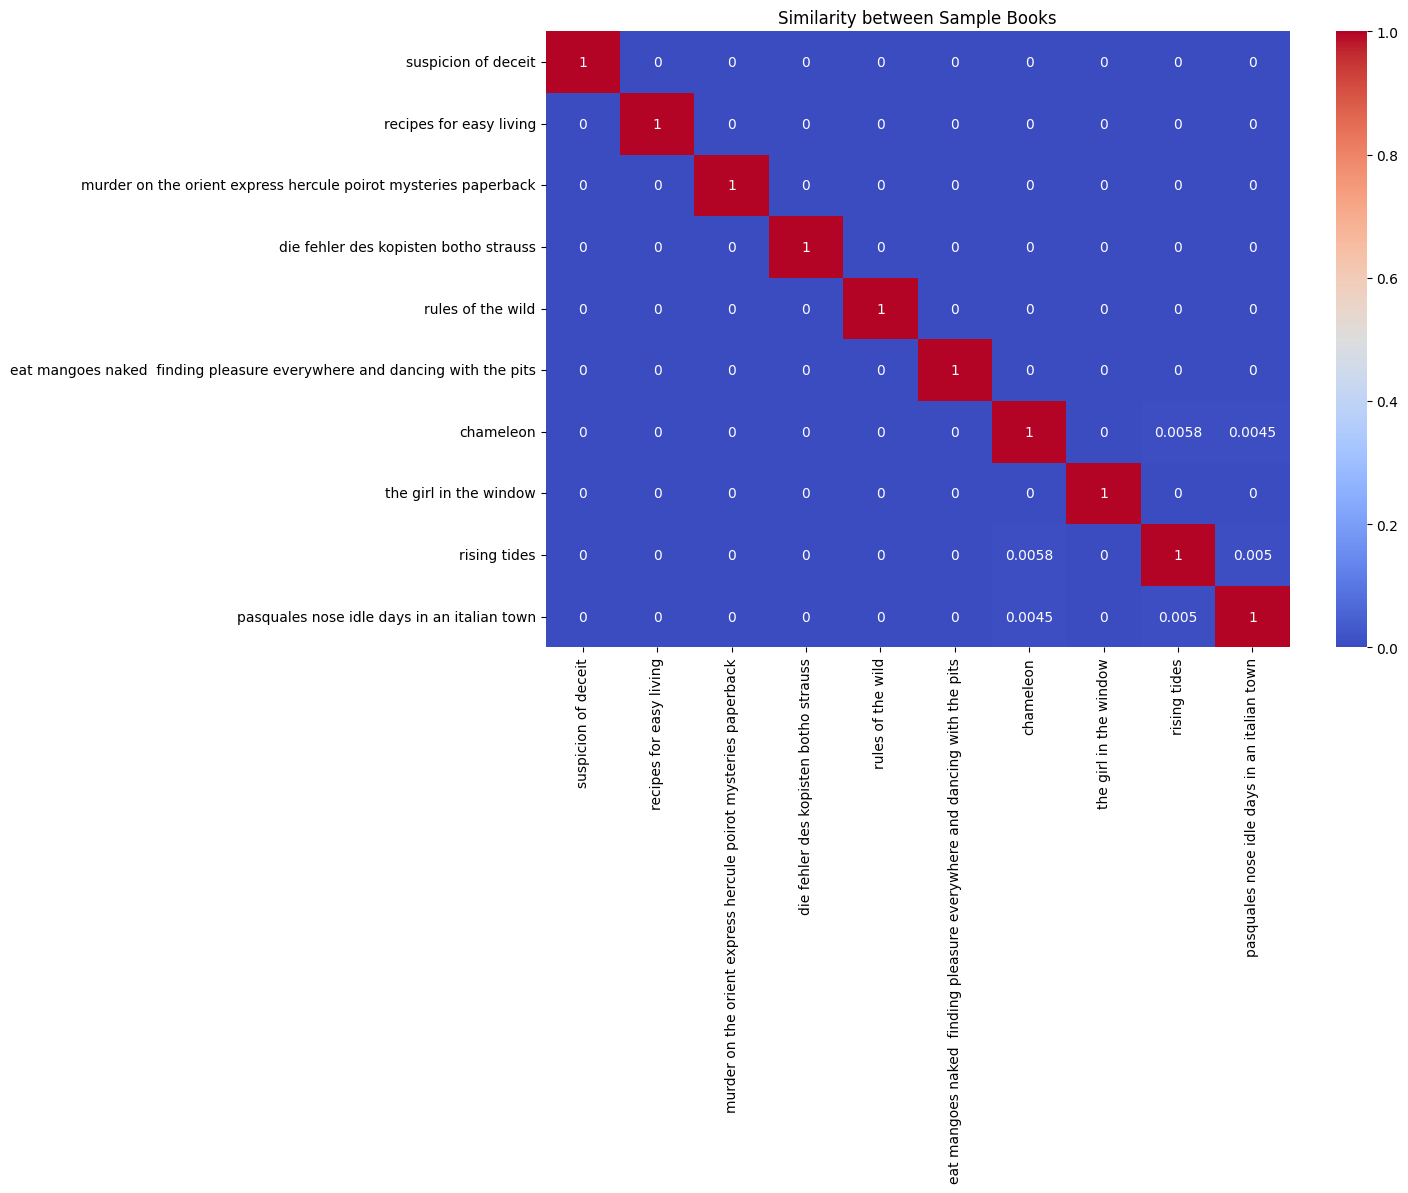

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select 10 random books
sample_indices = np.random.choice(range(len(books)), 10, replace=False)
sample_books = books.iloc[sample_indices]

# Compute pairwise similarity for the sample
sample_sim = cosine_similarity(tfidf_matrix[sample_indices], tfidf_matrix[sample_indices])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sample_sim, annot=True, xticklabels=sample_books['Book-Title'], yticklabels=sample_books['Book-Title'], cmap='coolwarm')
plt.title('Similarity between Sample Books')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


Recommendation Function

In [14]:
def recommend(title, cosine_sim=cosine_sim):
    title = clean_text(title)
    if title not in indices:
        print("Sorry, Book not found!")
        return []
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10
    book_indices = [i[0] for i in sim_scores]
    return books['Book-Title'].iloc[book_indices].tolist()

Evaluation

In [15]:
book_name = 'a matter of honor'
recommendations = recommend(book_name)

print(f"\nTop recommendations for '{book_name}':")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

NameError: name 'indices' is not defined